In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Questions</h3>

1. What type of restaurants do the majority of customers order from?
2. How many votes has eash ttype of restaurant received from the customers?
3. What are the ratings that the majority of restaurants have received?
4. Zomato has observed that most couples order most of their food online. What is their average spending on eachother?
5. Which mode (online or offline) has received the most ratings?
6. Which type of restaurants received more offline orders, so that Zomato can provide customers with some good offers?



In [2]:
df = pd.read_csv('Zomato-data.csv')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Data cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
def to_float(num):
    
    num = num.split('/')[0]
    
    return float(num)


In [8]:
df['rate'] = df['rate'].apply(to_float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

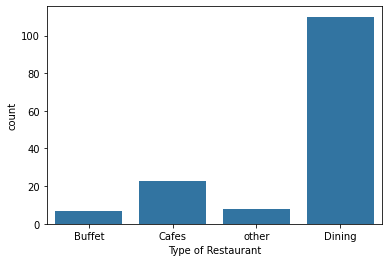

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

Majority of the customers order from a dining type of restaurant
<hr>

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

In [20]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

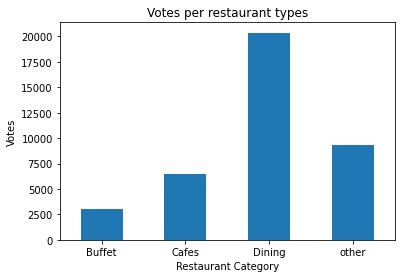

In [22]:
grouped_data.plot(kind='bar', x='listed_in(type)', y='votes')
plt.title('Votes per restaurant types')
plt.xlabel('Restaurant Category')
plt.ylabel('Votes')
plt.xticks(rotation=0)
plt.show()

Dining restaurants have the most type of votes

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [24]:
grouped_data_mean = df.groupby('listed_in(type)')['rate'].mean()

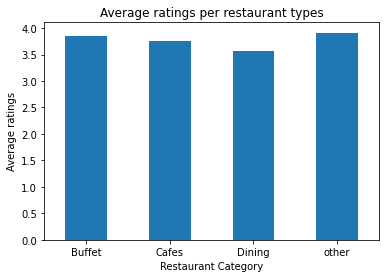

In [29]:
grouped_data_mean.plot(kind='bar', x='listed_in(type)', y='rate')
plt.xlabel('Restaurant Category')
plt.ylabel('Average ratings')
plt.title('Average ratings per restaurant types')
plt.xticks(rotation=0)
plt.show()




All the restaurant ratings are b/w 3.5-4.0 
<hr>

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

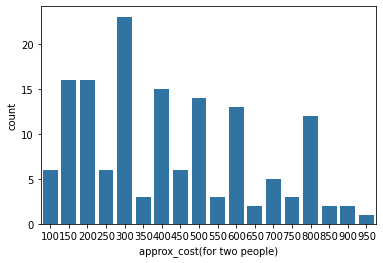

In [31]:
sns.countplot(x=df['approx_cost(for two people)'])

The average couple spent is 300rs


In [32]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [33]:
grouped_data_rating = df.groupby('online_order')['rate'].mean()

In [34]:
grouped_data_rating

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

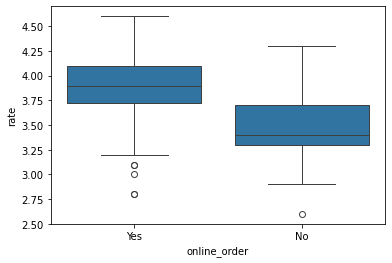

In [35]:
sns.boxplot(data=df, x='online_order',y='rate')

Online orders receive more ratings

In [37]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


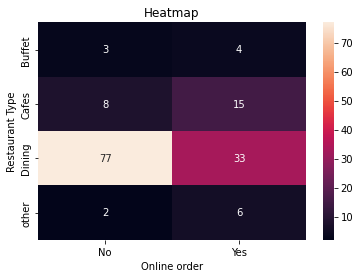

In [40]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Restaurant Type')
plt.xticks(rotation=0)
plt.show()




Most people dine at a dining restaurant, while most people order online for other types of restaurants